# Hemocyte Recruitment Analysis - exploratory analyis
This notebook takes dataframes of abdomen and hemocyte features produced by the notebook scale_coordinates_midsections.ipynb and produces visualizations of distributions across experimental groups for -
1. abdomen area 
2. total number of hemocytes detected
3. number of hemocytes detected per mm2 of abdomen area 
4. number/proportion/percent of hemocytes at distances away from abdomen centroid

Sections from the middle of the abdomen that are comparable across experimental groups are included. 

## Import required packages

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from pathlib import Path
import glob
from scipy import stats 

sns.set_style('white')
sns.set(font_scale=1.5)

color_scheme = {"Fed": "dodgerblue","Starved": "darkorange"}

import warnings
warnings.filterwarnings('ignore')

## Set up input/output directories

In [2]:

base_path = Path("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/")
outputs = base_path.joinpath('results','midsections')

hemocyte_coordinates = pd.read_csv(outputs.joinpath("hemocyte_coordinates_midsections.csv"), sep="\t",header=0)
abdomen_coordinates = pd.read_csv(outputs.joinpath("abdomen_coordinates_midsections.csv"), sep="\t",header=0) 


## Aggregate features by fly 

In [3]:
perfly_mean = abdomen_coordinates[['fly_ID', "condition", "Area µm^2","Num Detections", "Num Positive per mm^2" ]].groupby(['fly_ID', 'condition']).mean()
perfly_median = abdomen_coordinates[['fly_ID', "condition", "Area µm^2","Num Detections", "Num Positive per mm^2" ]].groupby(['fly_ID', 'condition']).median()
perfly_mean = perfly_mean.reset_index()
perfly_median = perfly_median.reset_index()

## Distribution of abdomen areas in fed and starved samples

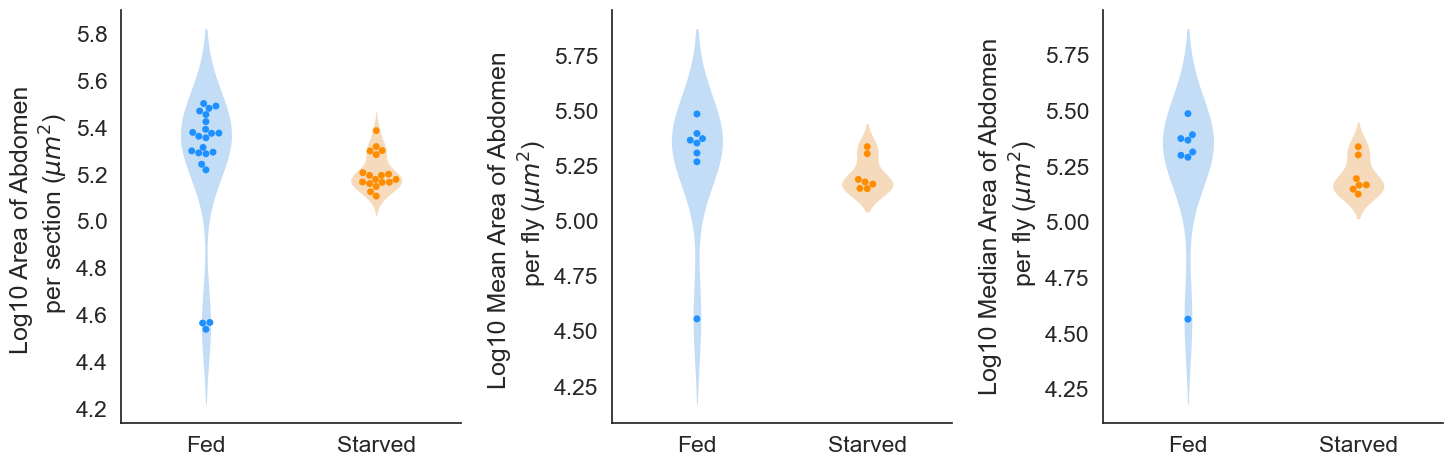

In [39]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig, ax = plt.subplots(1,3, figsize=(15,5))

## Per section 
sns.violinplot(y= np.log10(abdomen_coordinates['Area µm^2']), x= abdomen_coordinates['condition'], ax= ax[0],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3)
sns.swarmplot(y= np.log10(abdomen_coordinates['Area µm^2']), x= abdomen_coordinates['condition'], ax= ax[0], palette=color_scheme)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_ylabel("Log10 Area of Abdomen \n per section ($µm^2$)")
ax[0].set_xlabel("")

## Per fly mean 
sns.violinplot(y= np.log10(perfly_mean['Area µm^2']), x= perfly_mean['condition'], ax= ax[1],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3)
sns.swarmplot(y= np.log10(perfly_mean['Area µm^2']), x= perfly_mean['condition'], ax= ax[1], palette=color_scheme)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_ylabel(" Log10 Mean Area of Abdomen  \n per fly ($µm^2$)")
ax[1].set_xlabel("")
## Per fly median
sns.violinplot(y= np.log10(perfly_median['Area µm^2']), x= perfly_median['condition'], ax= ax[2],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3)
sns.swarmplot(y= np.log10(perfly_median['Area µm^2']), x= perfly_median['condition'], ax= ax[2], palette=color_scheme)
ax[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[2].set_ylabel(" Log10 Median Area of Abdomen \n per fly ($µm^2$)")
ax[2].set_xlabel("")

sns.despine(right = True)

fig.tight_layout()
fig.savefig(outputs.joinpath("abdomen_area.png"))






## One-sided independent samples t-test for area of abdomen

In [62]:
## Per section
print("per section :")
print(stats.ttest_ind(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed']['Area µm^2'],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved']['Area µm^2'],
                alternative="greater"))
                
print("per fly - mean :")
print(stats.ttest_ind(perfly_mean[perfly_mean['condition'] == 'Fed']['Area µm^2'],
                perfly_mean[perfly_mean['condition'] == 'Starved']['Area µm^2'],
                alternative="greater"))
                
print("per fly - median :")
print(stats.ttest_ind(perfly_median[perfly_median['condition'] == 'Fed']['Area µm^2'],
                perfly_median[perfly_median['condition'] == 'Starved']['Area µm^2'],
                alternative="greater"))

per section :
TtestResult(statistic=2.2222682263508173, pvalue=0.016146644861366542, df=38.0)
per fly - mean :
TtestResult(statistic=1.4101964052273284, pvalue=0.09097885033928342, df=13.0)
per fly - median :
TtestResult(statistic=1.4073331886154103, pvalue=0.09139333118999321, df=13.0)


## Distribution of total hemocyte detections in fed and starved samples

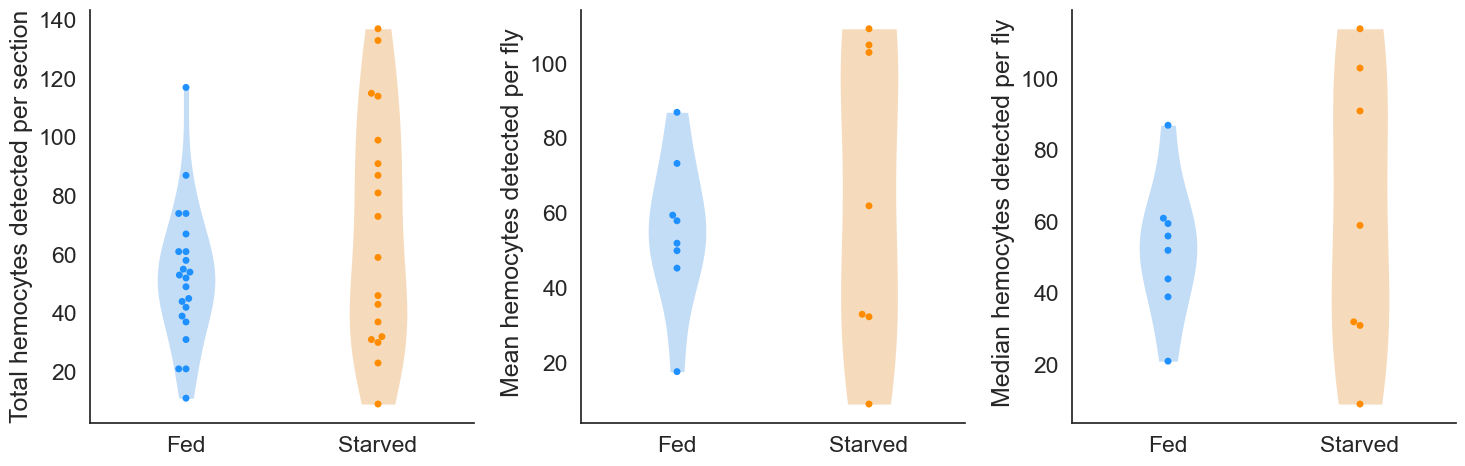

In [41]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig, ax = plt.subplots(1,3, figsize=(15,5))

## Per section 
sns.violinplot(y= abdomen_coordinates['Num Detections'], x= abdomen_coordinates['condition'], ax= ax[0],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3, cut=0)
sns.swarmplot(y= abdomen_coordinates['Num Detections'], x= abdomen_coordinates['condition'], ax= ax[0], palette=color_scheme)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_ylabel("Total hemocytes detected per section")
ax[0].set_xlabel("")

## Per fly mean 
sns.violinplot(y= perfly_mean['Num Detections'], x= perfly_mean['condition'], ax= ax[1],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3, cut=0)
sns.swarmplot(y= perfly_mean['Num Detections'], x= perfly_mean['condition'], ax= ax[1], palette=color_scheme)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_ylabel(" Mean hemocytes detected per fly")
ax[1].set_xlabel("")
## Per fly median
sns.violinplot(y= perfly_median['Num Detections'], x= perfly_median['condition'], ax= ax[2],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= perfly_median['Num Detections'], x= perfly_median['condition'], ax= ax[2], palette=color_scheme)
ax[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[2].set_ylabel(" Median hemocytes detected per fly")
ax[2].set_xlabel("")

sns.despine(right = True)

fig.tight_layout()
fig.savefig(outputs.joinpath("total_hemocytes_detected.png"))

## One-sided independent samples t-test for total hemocytes detected

In [63]:
## Per section
print("per section :")
print(stats.ttest_ind(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed']['Num Detections'],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
                
print("per fly - mean :")
print(stats.ttest_ind(perfly_mean[perfly_mean['condition'] == 'Fed']['Num Detections'],
                perfly_mean[perfly_mean['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
                
print("per fly - median :")
print(stats.ttest_ind(perfly_median[perfly_median['condition'] == 'Fed']['Num Detections'],
                perfly_median[perfly_median['condition'] == 'Starved']['Num Detections'],
                alternative="less"))

per section :
TtestResult(statistic=-1.6265230701960327, pvalue=0.056051972541983526, df=38.0)
per fly - mean :
TtestResult(statistic=-0.5743207775162018, pvalue=0.2877771749606143, df=13.0)
per fly - median :
TtestResult(statistic=-0.641071906037914, pvalue=0.2663076774324435, df=13.0)


## Distribution of hemocyte detections per mm^2 in fed and starved samples

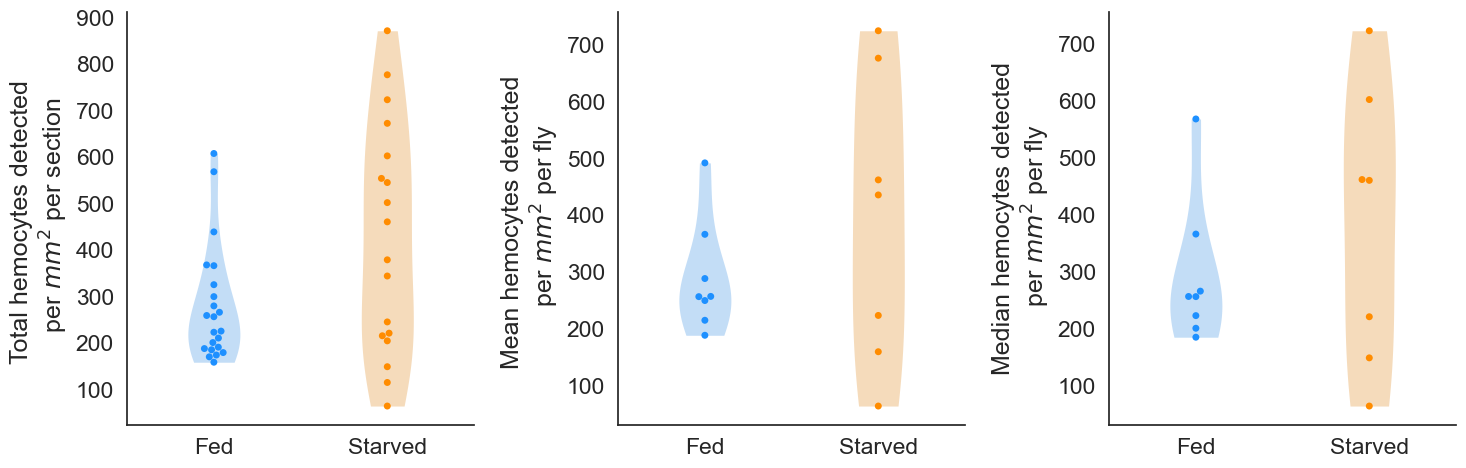

In [42]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig, axs = plt.subplots(1,3, figsize=(15,5))

## Per section 
sns.violinplot(y= abdomen_coordinates['Num Positive per mm^2'], x= abdomen_coordinates['condition'], ax= axs[0],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3, cut=0)
sns.swarmplot(y= abdomen_coordinates['Num Positive per mm^2'], x= abdomen_coordinates['condition'], ax= axs[0], palette=color_scheme)
axs[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
axs[0].set_ylabel("Total hemocytes detected \n per $mm^2$ per section")
axs[0].set_xlabel("")


## Per fly mean 
sns.violinplot(y= perfly_mean['Num Positive per mm^2'], x= perfly_mean['condition'], ax= axs[1],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3, cut=0)
sns.swarmplot(y= perfly_mean['Num Positive per mm^2'], x= perfly_mean['condition'], ax= axs[1], palette=color_scheme)
axs[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
axs[1].set_ylabel(" Mean hemocytes detected  \n per $mm^2$ per fly")
axs[1].set_xlabel("")

## Per fly median
sns.violinplot(y= perfly_median['Num Positive per mm^2'], x= perfly_median['condition'], ax= axs[2],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= perfly_median['Num Positive per mm^2'], x= perfly_median['condition'], ax= axs[2], palette=color_scheme)
axs[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
axs[2].set_ylabel(" Median hemocytes detected \n per $mm^2$ per fly")
axs[2].set_xlabel("")


sns.despine(right = True)

fig.tight_layout()
fig.savefig(outputs.joinpath("hemocytes_detected_permm2.png"))

## One-sided independent samples t-test for number of detections per mm^2

In [64]:
print("per section :")
print(stats.ttest_ind(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed']['Num Positive per mm^2'],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved']['Num Positive per mm^2'],
                alternative="less"))
                
print("per fly - mean :")
print(stats.ttest_ind(perfly_mean[perfly_mean['condition'] == 'Fed']['Num Positive per mm^2'],
                perfly_mean[perfly_mean['condition'] == 'Starved']['Num Positive per mm^2'],
                alternative="less"))
                
print("per fly - median :")
print(stats.ttest_ind(perfly_median[perfly_median['condition'] == 'Fed']['Num Positive per mm^2'],
                perfly_median[perfly_median['condition'] == 'Starved']['Num Positive per mm^2'],
                alternative="less"))

per section :
TtestResult(statistic=-2.433949278198256, pvalue=0.009872776490475776, df=38.0)
per fly - mean :
TtestResult(statistic=-1.0647276987708274, pvalue=0.15318811609040492, df=13.0)
per fly - median :
TtestResult(statistic=-0.9452434770625463, pvalue=0.1808864615936694, df=13.0)


## Number of hemocytes at distance away from abdomen centroid

In [7]:
#Add experimental group info to hemocyte detections
image_condition = pd.Series(abdomen_coordinates.condition.values, index=abdomen_coordinates.Image).to_dict()
hemocyte_coordinates['condition'] = hemocyte_coordinates['Image'].map(image_condition)

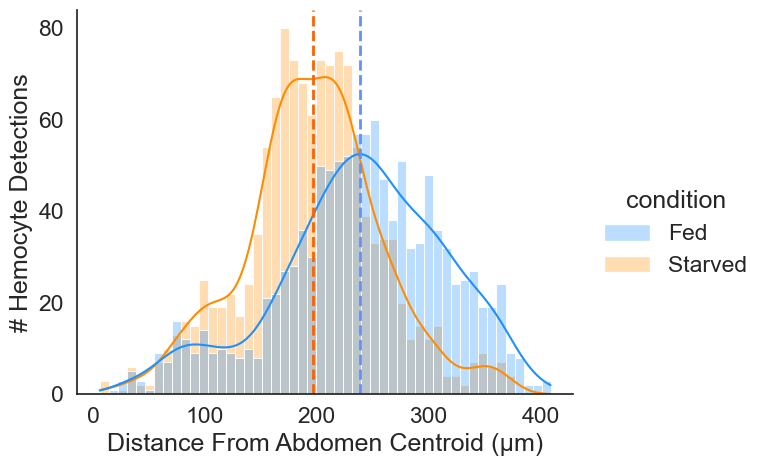

In [8]:

centroid_distance_dist = sns.displot(data=hemocyte_coordinates, x='centroid_distances', hue='condition',kde=True, bins=50,palette=color_scheme, alpha=0.3,
                                     height=5, aspect=1.25)
centroid_distance_dist.set(xlabel='Distance From Abdomen Centroid (µm)', ylabel='# Hemocyte Detections')

plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'].mean(),
            color="#648fff",
            ls='--', 
            lw=2)


plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'].mean(),
            color='#fe6100',
            ls='--', 
            lw=2)
#hemocyte_coordinates

In [66]:
# Scale all centroid distances by (sqrt of max dist of Fed abdomes * max dist of starved abdomens)*scaling_factor
max_fed = np.max(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'])
max_starved = np.max(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'])
scaling_factor = 1/100
print(np.sqrt(max_fed*max_starved)*scaling_factor) 
hemocyte_coordinates['scaled_centroid_distances'] = hemocyte_coordinates['centroid_distances']/(np.sqrt(max_fed*max_starved)*scaling_factor)

3.913085984444531


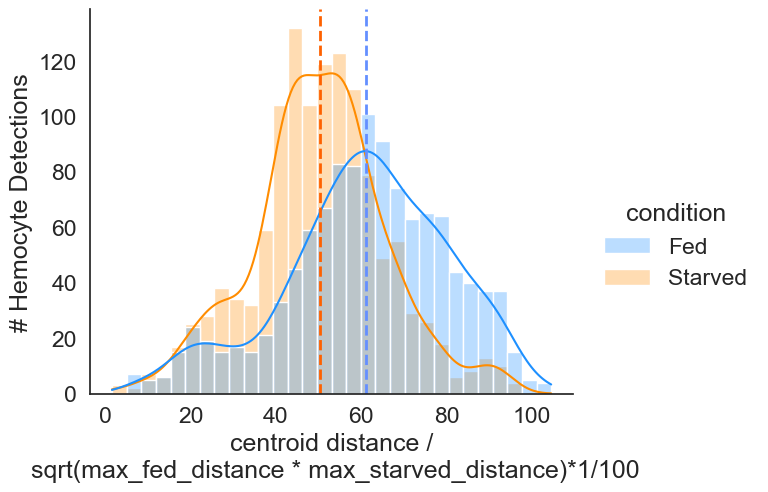

In [11]:
centroid_distance_dist = sns.displot(data=hemocyte_coordinates, x='scaled_centroid_distances', hue='condition',kde=True,palette=color_scheme, alpha=0.3,
                                     height=5, aspect=1.25)
centroid_distance_dist.set(xlabel='centroid distance /\n sqrt(max_fed_distance * max_starved_distance)*1/100', ylabel='# Hemocyte Detections')

plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['scaled_centroid_distances'].mean(),
            color="#648fff",
            ls='--', 
            lw=2)


plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['scaled_centroid_distances'].mean(),
            color='#fe6100',
            ls='--', 
            lw=2)
#hemocyte_coordinates

## Percent area of abdomen occupied by hemocytes

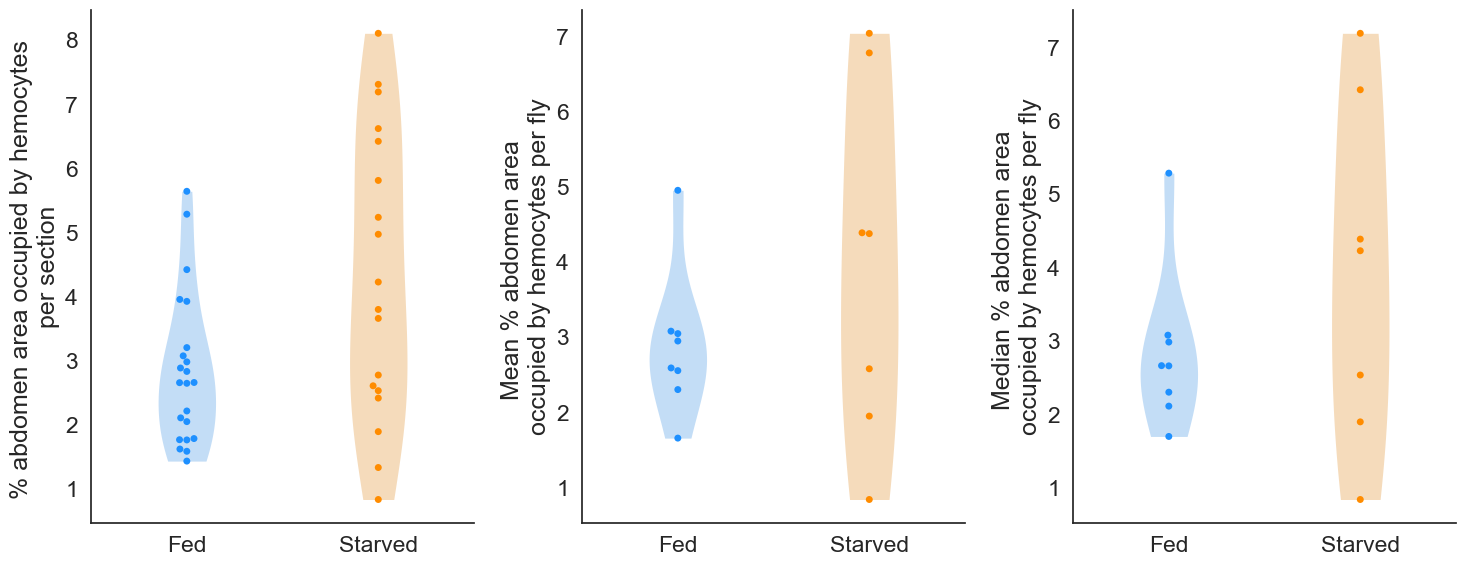

In [43]:
def get_abdomen_area(image, abdomen_features):
    abdomen_area = abdomen_features.loc[abdomen_features['Image'] == image]['Area µm^2'].item()
    return(abdomen_area)

#hemocyte_coordinates['abdomen_area'] = hemocyte_coordinates.apply(lambda x: get_abdomen_area(image=x.Image, abdomen_features=abdomen_coordinates), axis=1) 
percent_area_hemocytes_persection = hemocyte_coordinates[['Image','condition','fly_ID','Cell: Area']].groupby(['Image','condition','fly_ID']).sum()
percent_area_hemocytes_persection = percent_area_hemocytes_persection.reset_index()
percent_area_hemocytes_persection['abdomen_area'] = percent_area_hemocytes_persection.apply(lambda x: get_abdomen_area(x.Image, abdomen_features=abdomen_coordinates), axis=1) 
percent_area_hemocytes_persection['percent_area_hemocytes'] = 100*(percent_area_hemocytes_persection['Cell: Area']/percent_area_hemocytes_persection['abdomen_area'])

percent_area_hemocytes_perlfy_mean = percent_area_hemocytes_persection[['fly_ID','condition','percent_area_hemocytes']].groupby(['fly_ID', 'condition']).mean()
percent_area_hemocytes_perlfy_mean = percent_area_hemocytes_perlfy_mean.reset_index()
percent_area_hemocytes_perlfy_median = percent_area_hemocytes_persection[['fly_ID','condition','percent_area_hemocytes']].groupby(['fly_ID', 'condition']).median()
percent_area_hemocytes_perlfy_median = percent_area_hemocytes_perlfy_median.reset_index()

fig, ax = plt.subplots(1,3, figsize=(15,6))
## Per section
sns.violinplot(y= percent_area_hemocytes_persection['percent_area_hemocytes'], x= percent_area_hemocytes_persection['condition'], ax= ax[0],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= percent_area_hemocytes_persection['percent_area_hemocytes'], x= percent_area_hemocytes_persection['condition'], ax= ax[0], palette=color_scheme)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_ylabel("% abdomen area occupied by hemocytes \n per section ")
ax[0].set_xlabel("")

## Per fly mean
sns.violinplot(y= percent_area_hemocytes_perlfy_mean['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_mean['condition'], ax= ax[1],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= percent_area_hemocytes_perlfy_mean['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_mean['condition'], 
ax= ax[1], palette=color_scheme)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_ylabel("Mean % abdomen area \n occupied by hemocytes per fly ")
ax[1].set_xlabel("")

## per fly median
sns.violinplot(y= percent_area_hemocytes_perlfy_median['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_median['condition'], ax= ax[2],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= percent_area_hemocytes_perlfy_median['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_median['condition'], ax= ax[2], palette=color_scheme)
ax[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[2].set_ylabel("Median % abdomen area \n occupied by hemocytes per fly ")
ax[2].set_xlabel("")

sns.despine(right = True)


fig.tight_layout()
fig.savefig(outputs.joinpath("percent_abdomen_area.png"))


## One-sided independent samples t-test for percent abdomen area occupied by hemocytes 

In [69]:

print("per section :")
print(stats.ttest_ind(percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
                
print("per fly - mean :")
print(stats.ttest_ind(percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
                
print("per fly - median :")
print(stats.ttest_ind(percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))

per section :
TtestResult(statistic=-2.6904146043015937, pvalue=0.005272896414826497, df=38.0)
per fly - mean :
TtestResult(statistic=-1.2161930679105755, pvalue=0.12276684992968091, df=13.0)
per fly - median :
TtestResult(statistic=-1.175564405493328, pvalue=0.13042508224303162, df=13.0)


## Hemocyte spatial density across replicates 

(-300.0, 300.0)

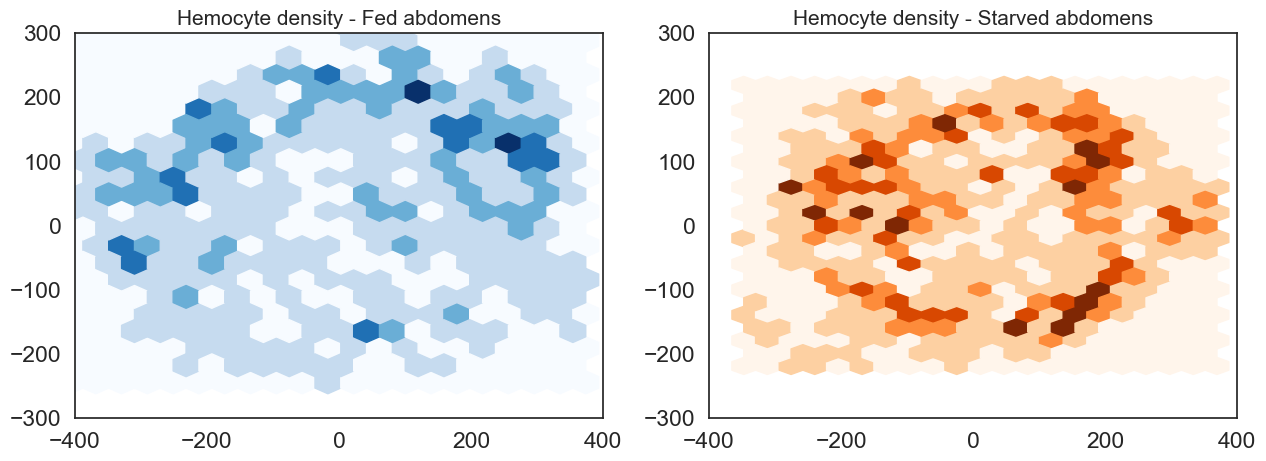

In [14]:
# point density plot - all replicates per group 
fig, ax = plt.subplots(1,2,figsize=(15,5))
fed_x = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_x_zeroscaled']
fed_y = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_y_zeroscaled']

starved_x = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_x_zeroscaled']
starved_y = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_y_zeroscaled']

ax[0].hexbin(fed_x,fed_y, bins=5, gridsize=20, cmap = "Blues")
ax[0].set_title("Hemocyte density - Fed abdomens", fontsize=15)
ax[0].set_xlim(-400,400)
ax[0].set_ylim(-300,300)

ax[1].hexbin(starved_x, starved_y, bins=5, gridsize=20, cmap = "Oranges")
ax[1].set_title("Hemocyte density - Starved abdomens", fontsize=15)
ax[1].set_xlim(-400,400)
ax[1].set_ylim(-300,300)

## Proportion of hemocytes at distances away from abdomen centroid 

In [15]:
# For each abdomen - 
# Take area of abdomen as circle and get radii of circle
# Split radii into 10 equal parts 
# How many hemocytes in each percentile away from abdomen center? 
from scipy.stats import percentileofscore
def get_hemcocyte_loc_percentile(centroid_distance, image_ID, hemocyte_measurements, adbomen_measurements):
#for fly in hemocyte_coordinates['Image'].unique():
    #print(fly)
    abdomen_area = adbomen_measurements.loc[adbomen_measurements['Image']==image_ID]['Area µm^2']
    radius = np.sqrt(abdomen_area.iloc[0]/np.pi)
    radiipercentile = np.linspace(0, radius, 10)
    hemocyte_at_percentile = percentileofscore(radiipercentile, centroid_distance)
    return(hemocyte_at_percentile)
    

In [16]:
hemocyte_coordinates['hemocyte_at_percentile_distance'] = hemocyte_coordinates.apply(lambda row: 
                                                                            get_hemcocyte_loc_percentile(row['centroid_distances'], 
                                                                                                         row['Image'],
                                                                                                         hemocyte_coordinates,
                                                                                                         abdomen_coordinates), 
                                                                                                         axis=1)



[Text(0.5, 0, 'Percentile distance from abdomen centroid'),
 Text(0, 0.5, '% Hemocyte Detections')]

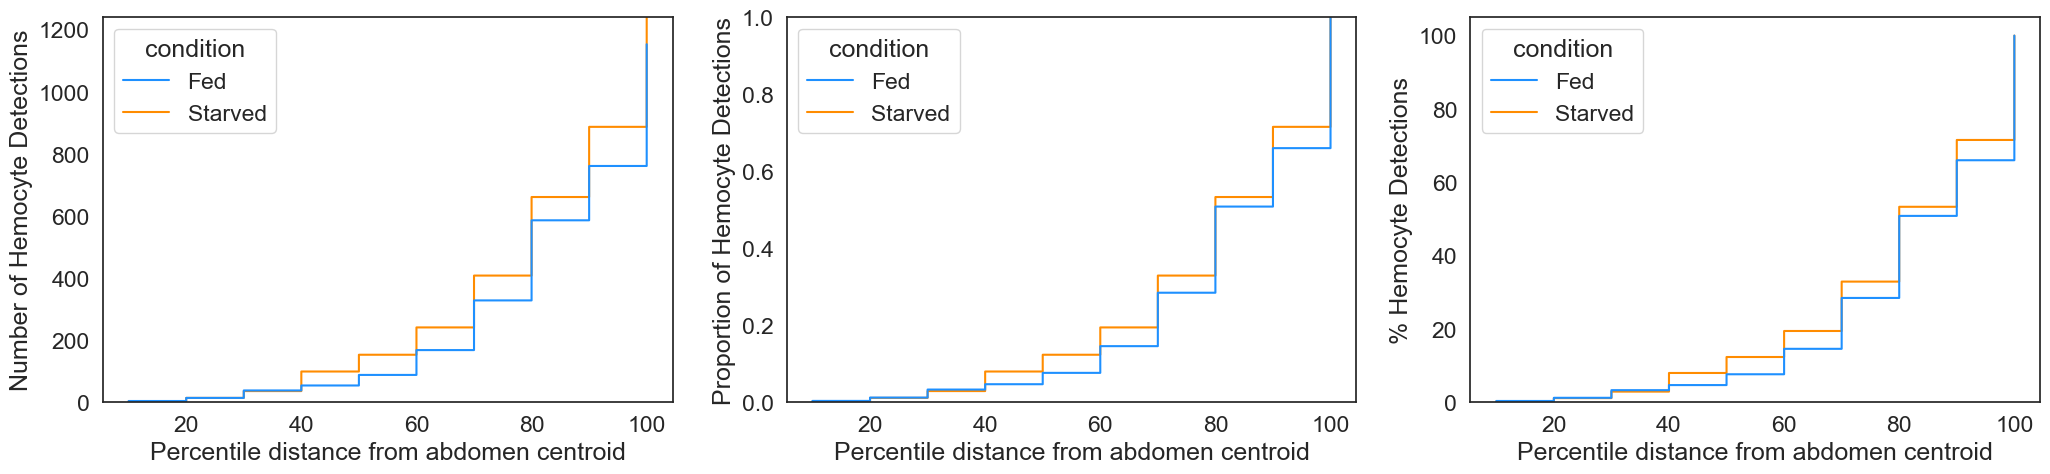

In [17]:
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance", 
                                              hue="condition", palette=color_scheme,stat="count",
                                              complementary=False, ax=ax[0])
ax[0].set(xlabel='Percentile distance from abdomen centroid', ylabel='Number of Hemocyte Detections')

sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance", 
                                              hue="condition", palette=color_scheme,stat="proportion",
                                              complementary=False, ax=ax[1])
ax[1].set(xlabel='Percentile distance from abdomen centroid', ylabel='Proportion of Hemocyte Detections')
sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance", 
                                              hue="condition", palette=color_scheme,stat="percent",
                                              complementary=False, ax=ax[2])
ax[2].set(xlabel='Percentile distance from abdomen centroid', ylabel='% Hemocyte Detections')

